In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ..utils import create_dataloader, create_weighted_dataloader


In [2]:
balanced_loader = create_dataloader(1, train=True, generator=None)


/home/pia/Documents/KD_Lib/kd_venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [3]:
len(balanced_loader)


60000

In [4]:
imbalanced_loader = create_weighted_dataloader(1, train=True, generator=None)


60000


In [5]:
len(imbalanced_loader)


60000

In [6]:
num_classes = 10
labels_list = range(num_classes)


In [7]:
def get_random_samples(dl, max_count=1000):
    labels = []
    for count, (_, label) in enumerate(dl):
        if count > max_count:
            break
        else:
            labels.append(label.item())
    return labels


In [8]:
balanced_labels = get_random_samples(balanced_loader)
imbalanced_labels = get_random_samples(imbalanced_loader)


Distribution of classes in original dataset:


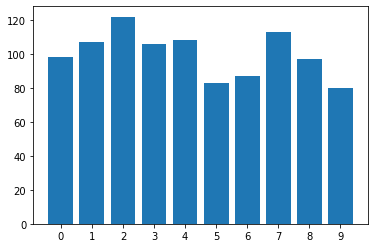

In [9]:
print('Distribution of classes in original dataset:')
fig, ax = plt.subplots()
counts1 = np.unique(balanced_labels, return_counts=True)
ax.bar(counts1[0], counts1[1])
ax.set_xticks(counts1[0])
plt.show()


Distribution of sampler in imbalanced dataloader:


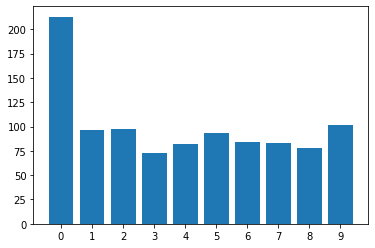

In [10]:
print('Distribution of sampler in imbalanced dataloader:')
fig, ax = plt.subplots()
counts2 = np.unique(imbalanced_labels, return_counts=True)
ax.bar(counts2[0], counts2[1])
ax.set_xticks(counts2[0])
plt.show()


In [11]:
counts1, counts2


((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([ 98, 107, 122, 106, 108,  83,  87, 113,  97,  80])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([213,  96,  97,  73,  82,  93,  84,  83,  78, 102])))

In [12]:
np.mean(counts1[1][1:]), np.mean(counts2[1][1:])


(100.33333333333333, 87.55555555555556)

In [13]:
counts1[1][0], counts2[1][0]


(98, 213)